In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Final structure of the dataset:
              Data Type
carat           float64
cut      string[python]
color    string[python]
clarity  string[python]
depth           float64
table           float64
price             int64
x               float64
y               float64
z               float64


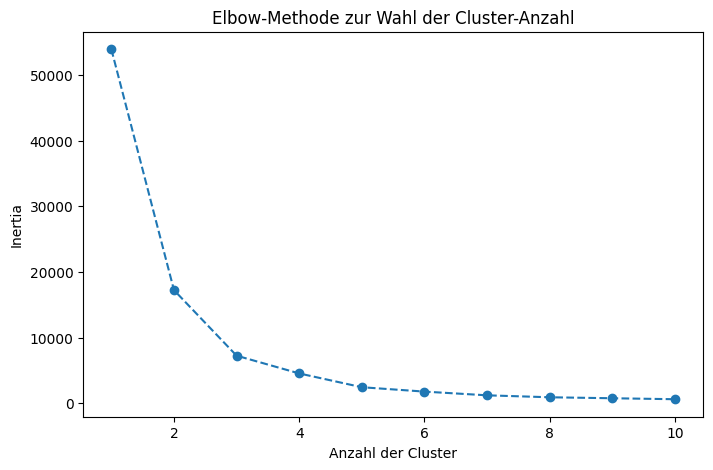

C:\Users\hasse\AppData\Local\Temp\ipykernel_27716\3356648118.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['Cluster'] = kmeans.fit_predict(df_scaled)


Cluster-Zentren:
 [[-0.04102951]
 [ 2.80323435]
 [-0.96656371]
 [ 0.61442184]
 [-0.5568708 ]
 [ 1.56518691]]
Cluster
2    16967
3    12462
0     9506
4     8067
5     4704
1     2234
Name: count, dtype: int64


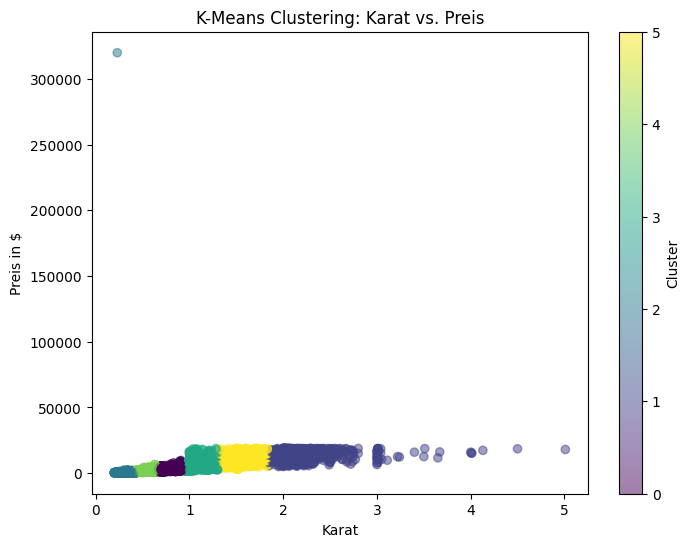

In [ ]:
silent = True
%run ../dataLoadAndPrepare.ipynb

#print(df.head())
#print(df.info())

features = ['carat']
df_numeric = df[features]

# Nur numerische Spalten auswählen --> k-means kann nur gut mit numerischen Daten umgehen


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

#Bestimmung der Anzahl der Cluster
# Elbow-Methode

inertia = []
cluster_range = range(1, 11)  # Testen von 1 bis 10 Clustern

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    
# Plot der Inertia-Werte
plt.figure(figsize=(8,5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Inertia')
plt.title('Elbow-Methode zur Wahl der Cluster-Anzahl')
plt.show()

# Vor k = 2 nimmt die Inertia sehr stark ab.
# Nach k = 3 wird die Reduktion kleiner, d. h., zusätzliche Cluster verbessern die Clustering-Qualität nicht mehr so stark.



# K-Means Clustering mit k = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_numeric['Cluster'] = kmeans.fit_predict(df_scaled)

# Cluster-Zentren anzeigen
print("Cluster-Zentren:\n", kmeans.cluster_centers_)

# Cluster-Anzahl überprüfen
print(df_numeric['Cluster'].value_counts())


# Scatterplot der Cluster
plt.figure(figsize=(8,6))
plt.scatter(df_numeric['carat'], df_numeric['price'], c=df_numeric['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel("Karat")
plt.ylabel("Preis in $")
plt.title("K-Means Clustering: Karat vs. Preis")
plt.colorbar(label="Cluster")
plt.show()